### Visualizador de soluciones GRASP

In [1]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


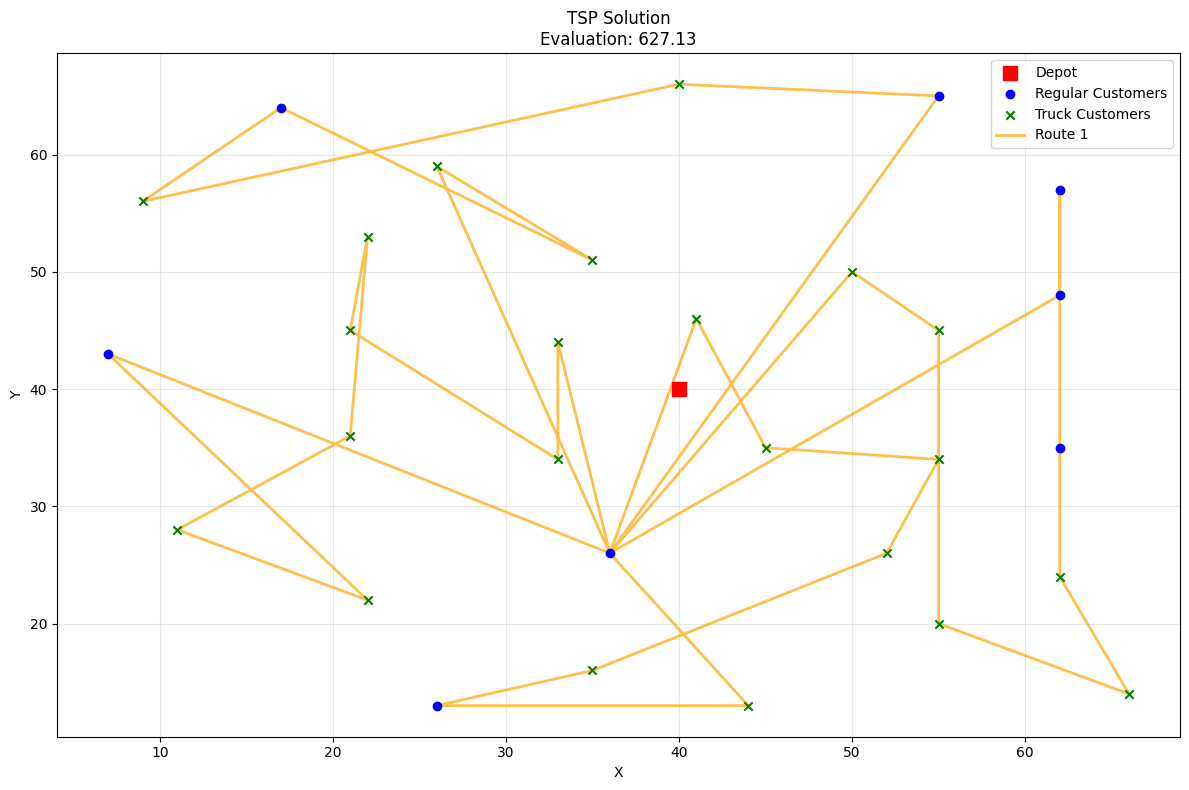

In [9]:
import matplotlib.pyplot as plt

def read_instance(filename):
    """Lee el archivo de instancia y retorna un diccionario con las coordenadas y datos de cada cliente"""
    coordinates = {}
    
    with open(filename, 'r') as file:
        # Skip the first line
        next(file)
        
        # Read deposit (client 0)
        deposit_data = next(file).split()
        coordinates[0] = {
            'x': float(deposit_data[1]),
            'y': float(deposit_data[2]),
            'demand': 0,
            'truck_customer': False
        }
        
        # Read client data
        for line in file:
            client_data = line.split()
            client_num = int(client_data[0])
            coordinates[client_num] = {
                'x': float(client_data[1]),
                'y': float(client_data[2]),
                'demand': float(client_data[3]),
                'truck_customer': bool(int(client_data[4]))
            }
    
    return coordinates

def plot_tsp_solution(routes, coordinates, eval_value, filename):
    """Grafica la solución TSP usando las coordenadas reales"""
    plt.figure(figsize=(12, 8))
    colors = ["orange", "red", "green", "violet", "purple"]
    
    # Primero graficamos todos los puntos
    # Depot
    depot_data = coordinates[0]
    plt.scatter(depot_data['x'], depot_data['y'], 
               color='red', marker='s', s=100, label='Depot', zorder=5)
    
    # Clientes normales y de camión
    normal_x = [data['x'] for num, data in coordinates.items() if num != 0 and not data['truck_customer']]
    normal_y = [data['y'] for num, data in coordinates.items() if num != 0 and not data['truck_customer']]
    truck_x = [data['x'] for num, data in coordinates.items() if num != 0 and data['truck_customer']]
    truck_y = [data['y'] for num, data in coordinates.items() if num != 0 and data['truck_customer']]
    
    plt.scatter(normal_x, normal_y, color='blue', marker='o', label='Regular Customers', zorder=4)
    plt.scatter(truck_x, truck_y, color='green', marker='x', label='Truck Customers', zorder=4)
    
    # Luego graficamos las rutas
    for i, route in enumerate(routes):
        route_x = [coordinates[point]['x'] for point in route]
        route_y = [coordinates[point]['y'] for point in route]
        
        # Dibujar líneas de la ruta
        plt.plot(route_x, route_y, 
                color=colors[i % len(colors)], 
                alpha=0.7,
                linewidth=2,
                label=f'Route {i+1}')
    
    plt.title(f'TSP Solution\nEvaluation: {eval_value}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

def parse_solution_file(filename):
    """Lee el archivo de solución y retorna las rutas y el valor de evaluación"""
    routes = []
    current_route = []
    eval_value = None
    
    with open(filename, 'r') as file:
        for line in file:
            elements = line.strip().split()
            
            if 'E' in line:  # Línea de evaluación
                eval_value = float(elements[1])
                continue
            
            # Convertir los puntos a números enteros
            route = [int(x) for x in elements]
            routes.append(route)
    
    return routes, eval_value

# Plot the TSP solution with multiple vehicles
instance_file = "instancesMedium/chao_6.30c.dat"
solution_file = "/home/bryangzr/TruckTrailer/Truck-and-trailer/facti_sols/chao_6.30c/SolutionC/chao_6.30c_SolutionC_run1.txt"

# Leer los datos de la instancia
coordinates = read_instance(instance_file)

# Leer la solución
routes, eval_value = parse_solution_file(solution_file)

# Graficar la solución
plot_tsp_solution(routes, coordinates, eval_value, instance_file)
